# **Introduction**

Student dropout and academic failure remain critical barriers to societal progress and economic development. These issues affect not only individuals but also families, educational institutions, and the wider community. According to the Education Data Initiative, nearly 40% of undergraduate students in the United States discontinue their studies before earning a degree. This decision often comes with long-term consequences: college dropouts tend to earn about 35% less than graduates and face a 20% higher risk of unemployment.


This project focuses on developing a predictive classification model to anticipate student dropout risks. The goal is to help identify students who may require additional support early on, enabling institutions to take preventive action.

The study seeks to answer the following key questions:

- What are the main factors contributing to student dropout?

- How can we identify students most at risk of leaving school prematurely?

# **Dataset Overview**



The dataset consists of 4,424 student records, each described by 35 features. These features include demographic details, socioeconomic indicators, macroeconomic variables, and academic performance data from the first and second semesters. All data were collected at the time of student enrollment or shortly after.

# Import Library

The Import Library section is a crucial first step in any machine learning project. This is where we load all the necessary libraries and modules required to perform data processing, analysis, visualization, and modeling.

In [72]:
# Core libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Statistical tools and preprocessing utilities
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


# Machine learning tools: splitting, modeling, and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

# Metrics and evaluation helpers
from sklearn.metrics import (
    balanced_accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Import Data

The Import Data section is where the dataset is loaded into the working environment for analysis and modeling. This step involves reading the data file—commonly in formats like CSV, Excel, or JSON—and converting it into a structured format such as a DataFrame using libraries like pandas.

In [73]:
# Downloading Dataset
nama_dataset = "thedevastator/higher-education-predictors-of-student-retention"
lokasi_dataset = kagglehub.dataset_download(nama_dataset)
print("Lokasi dataset:", lokasi_dataset)

Lokasi dataset: /kaggle/input/higher-education-predictors-of-student-retention


In [74]:
# Folder Check
files = os.listdir(lokasi_dataset)
print("Daftar file dalam folder dataset:", files)

Daftar file dalam folder dataset: ['dataset.csv']


In [75]:
# Path co CSV
csv_file = os.path.join(lokasi_dataset, "dataset.csv")
df = pd.read_csv(csv_file)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [76]:
# Dataset shape
df.shape

(4424, 35)

In [77]:
# Dataset information data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [78]:
# Rename Typo Feature Name
df = df.rename(columns={'Nacionality': 'Nationality'})

In [79]:
# Changing some Feature to Right data type
# Changing numeric data (int64/float64) to categorical data type
for col in df.select_dtypes(include=['int64', 'float64','object']).columns:
    df[col] = df[col].astype('category')

# Changing specific columns back to numeric (int64)
columns_to_int = [
    'Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)'
]
for col in columns_to_int:
    df[col] = df[col].astype('int64')

# Changing specific columns back to numeric (float64)
columns_to_float = [
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

for col in columns_to_float:
    df[col] = df[col].astype('float64')

In [80]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Nationality                                     4424 non-null   category
 7   Mother's qualification                          4424 non-null   category
 8   Father's qualification                          4424 non-null   category
 9   Mother's occupation           

In [81]:
# Checking Duplicate and Missing Value
print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) was conducted to gain an initial understanding of the dataset by examining the data types, checking for missing values, and summarizing both numerical and categorical variables. Descriptive statistics and visualizations were used to explore feature distributions, identify patterns, and detect potential outliers. This process provided valuable insights into the data’s structure and relationships, guiding feature selection and preprocessing steps for the modeling phase.

In [82]:
#descriptive analysis
df.describe()

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


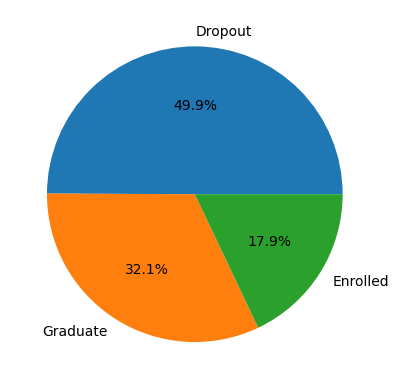

In [83]:
# Student Status Distribution
plt.pie(df["Target"].value_counts(), labels=df["Target"].unique(), autopct='%1.1f%%')
plt.show()

In [84]:
# Encoding Target feature
# Encode the labels as ordinal data (0 - 'Dropout', 1 - 'Enrolled', and 2 - 'Graduate')
df['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df[['Target']])

# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)
df['Target_encoded'] = df['Target_encoded'].astype('category')

In [85]:
# Chi-square Independent Test for categorical data
categorical_col = df.select_dtypes(include=['category']).columns
p_value = []

for col in categorical_col:
    crosstable = pd.crosstab(index = df[col],
                             columns = df['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

result = pd.DataFrame({
    'Variable': categorical_col,
    'P_value': [round(ele, 5) for ele in p_value]
})

result = result.sort_values('P_value')
result

,Variable,P_value
0,Marital status,0.00000
1,Application mode,0.00000
2,Course,0.00000
3,Daytime/evening attendance,0.00000
4,Previous qualification,0.00000
6,Mother's qualification,0.00000
7,Father's qualification,0.00000
8,Mother's occupation,0.00000
14,Gender,0.00000
9,Father's occupation,0.00000


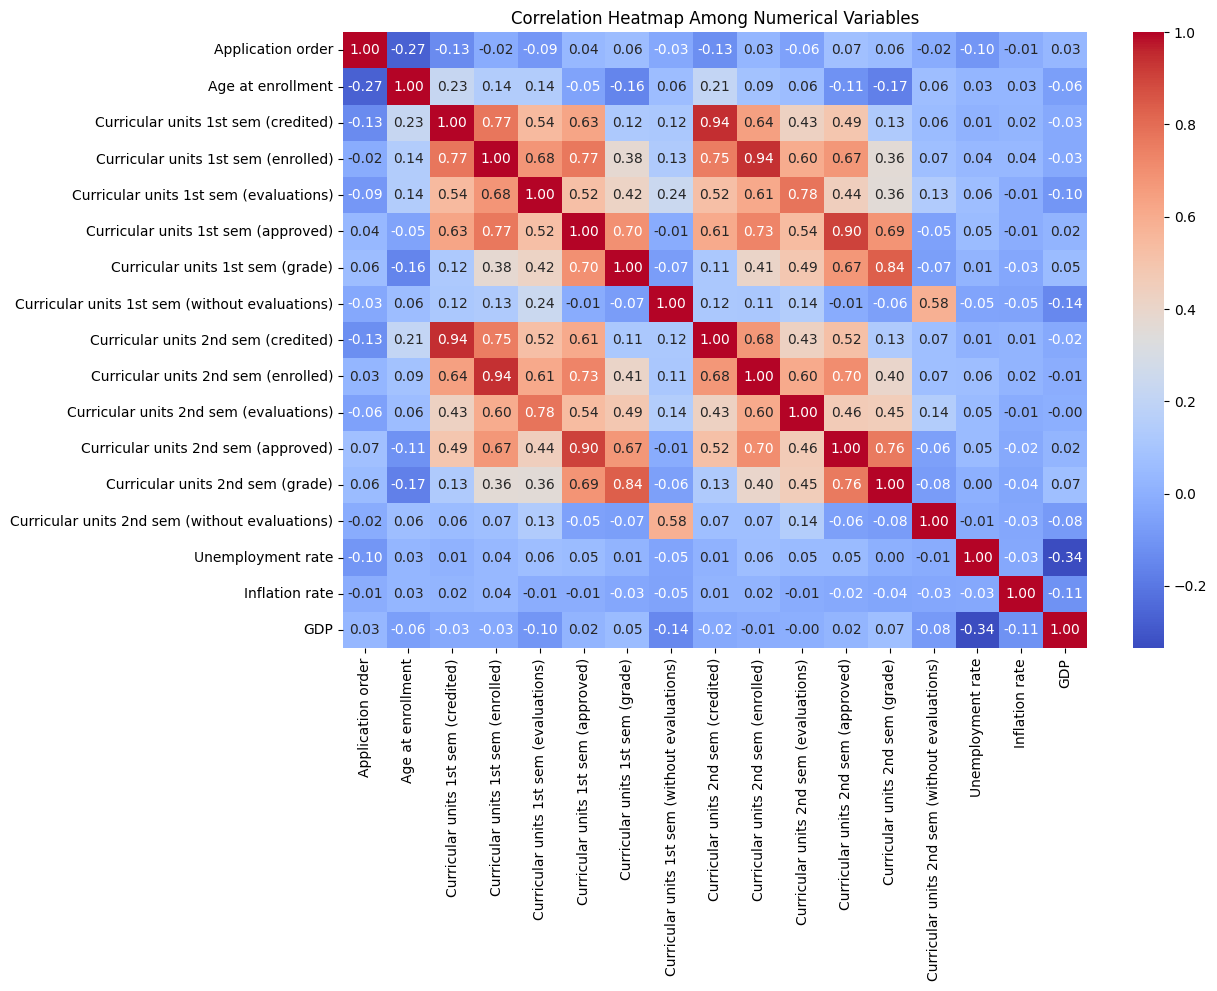

In [86]:
# Pearson Correlation Matrix for Numerical Data
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Among Numerical Variables')
plt.show()

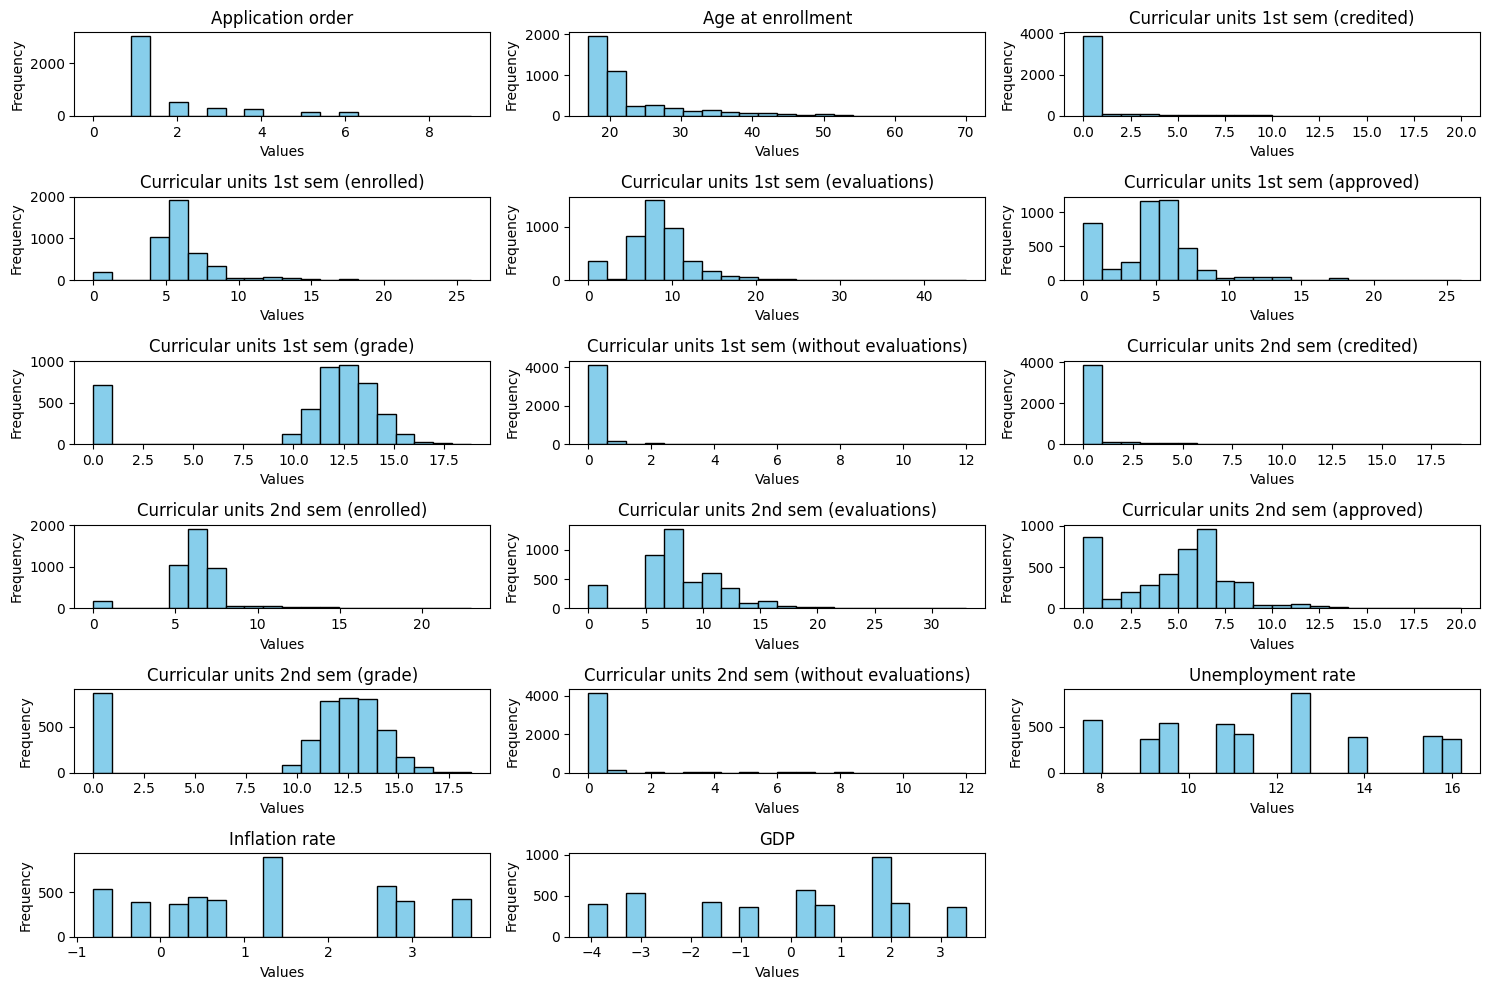

In [87]:
# Create histograms for each numerical column
plt.figure(figsize=(15, 10))  # Adjust the figure size
for i, col in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col) // 3 + 1, 3, i)  # Create subplots in a grid
    df[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing
plt.show()

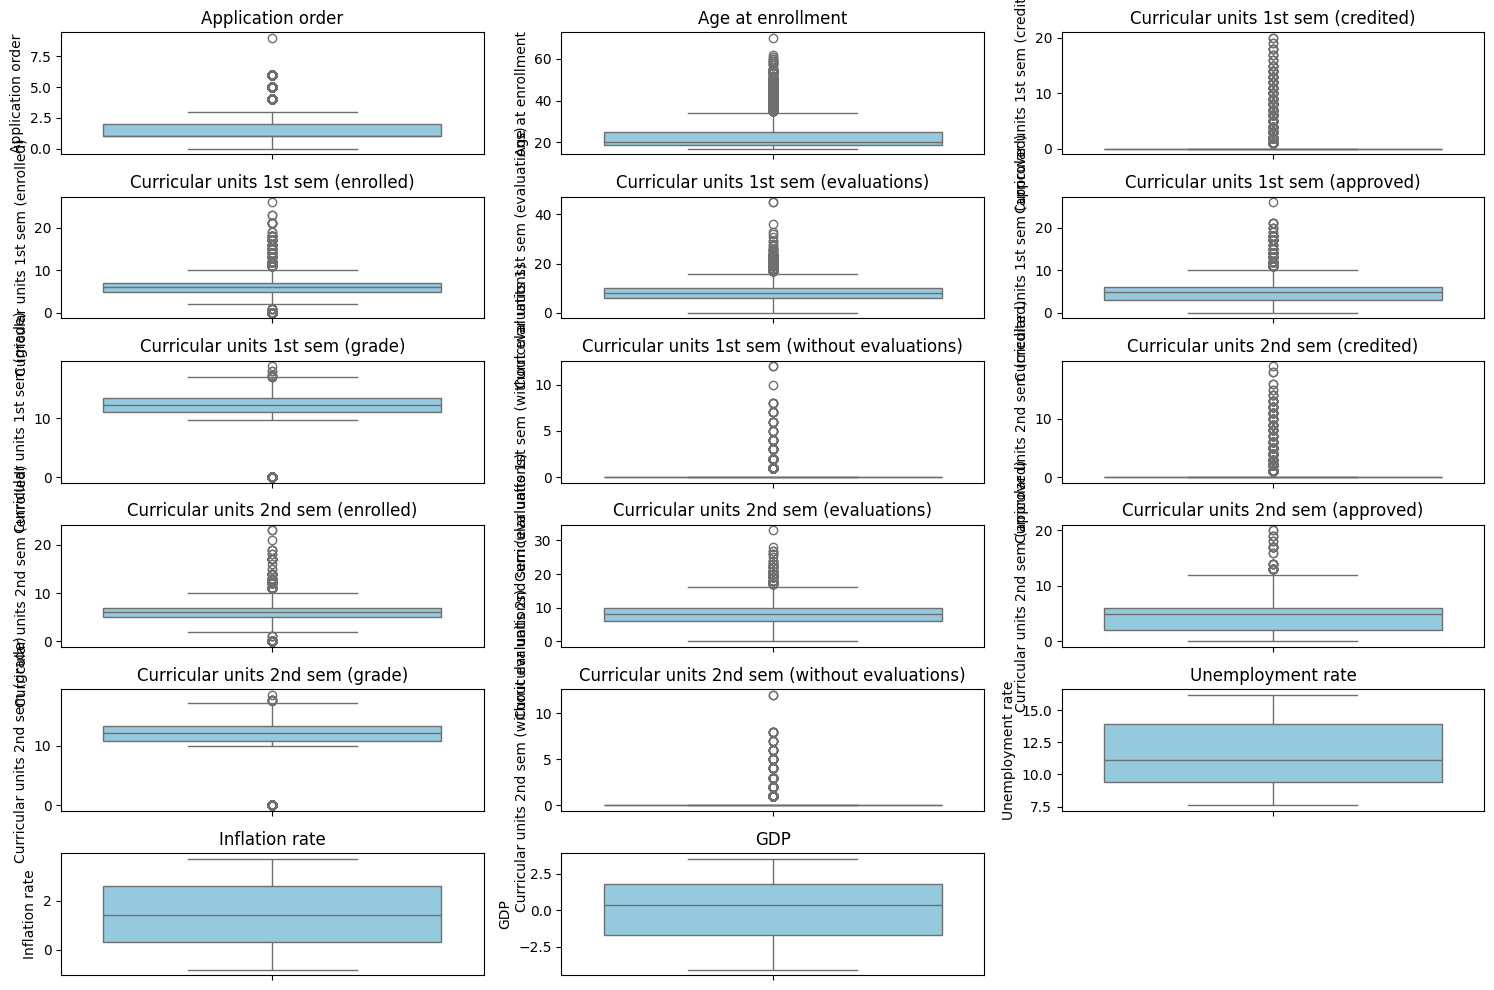

In [88]:
# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))  # Adjust the figure size
for i, col in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col) // 3 + 1, 3, i)  # Create subplots in a grid
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(col)

plt.tight_layout()  # Adjust spacing
plt.show()

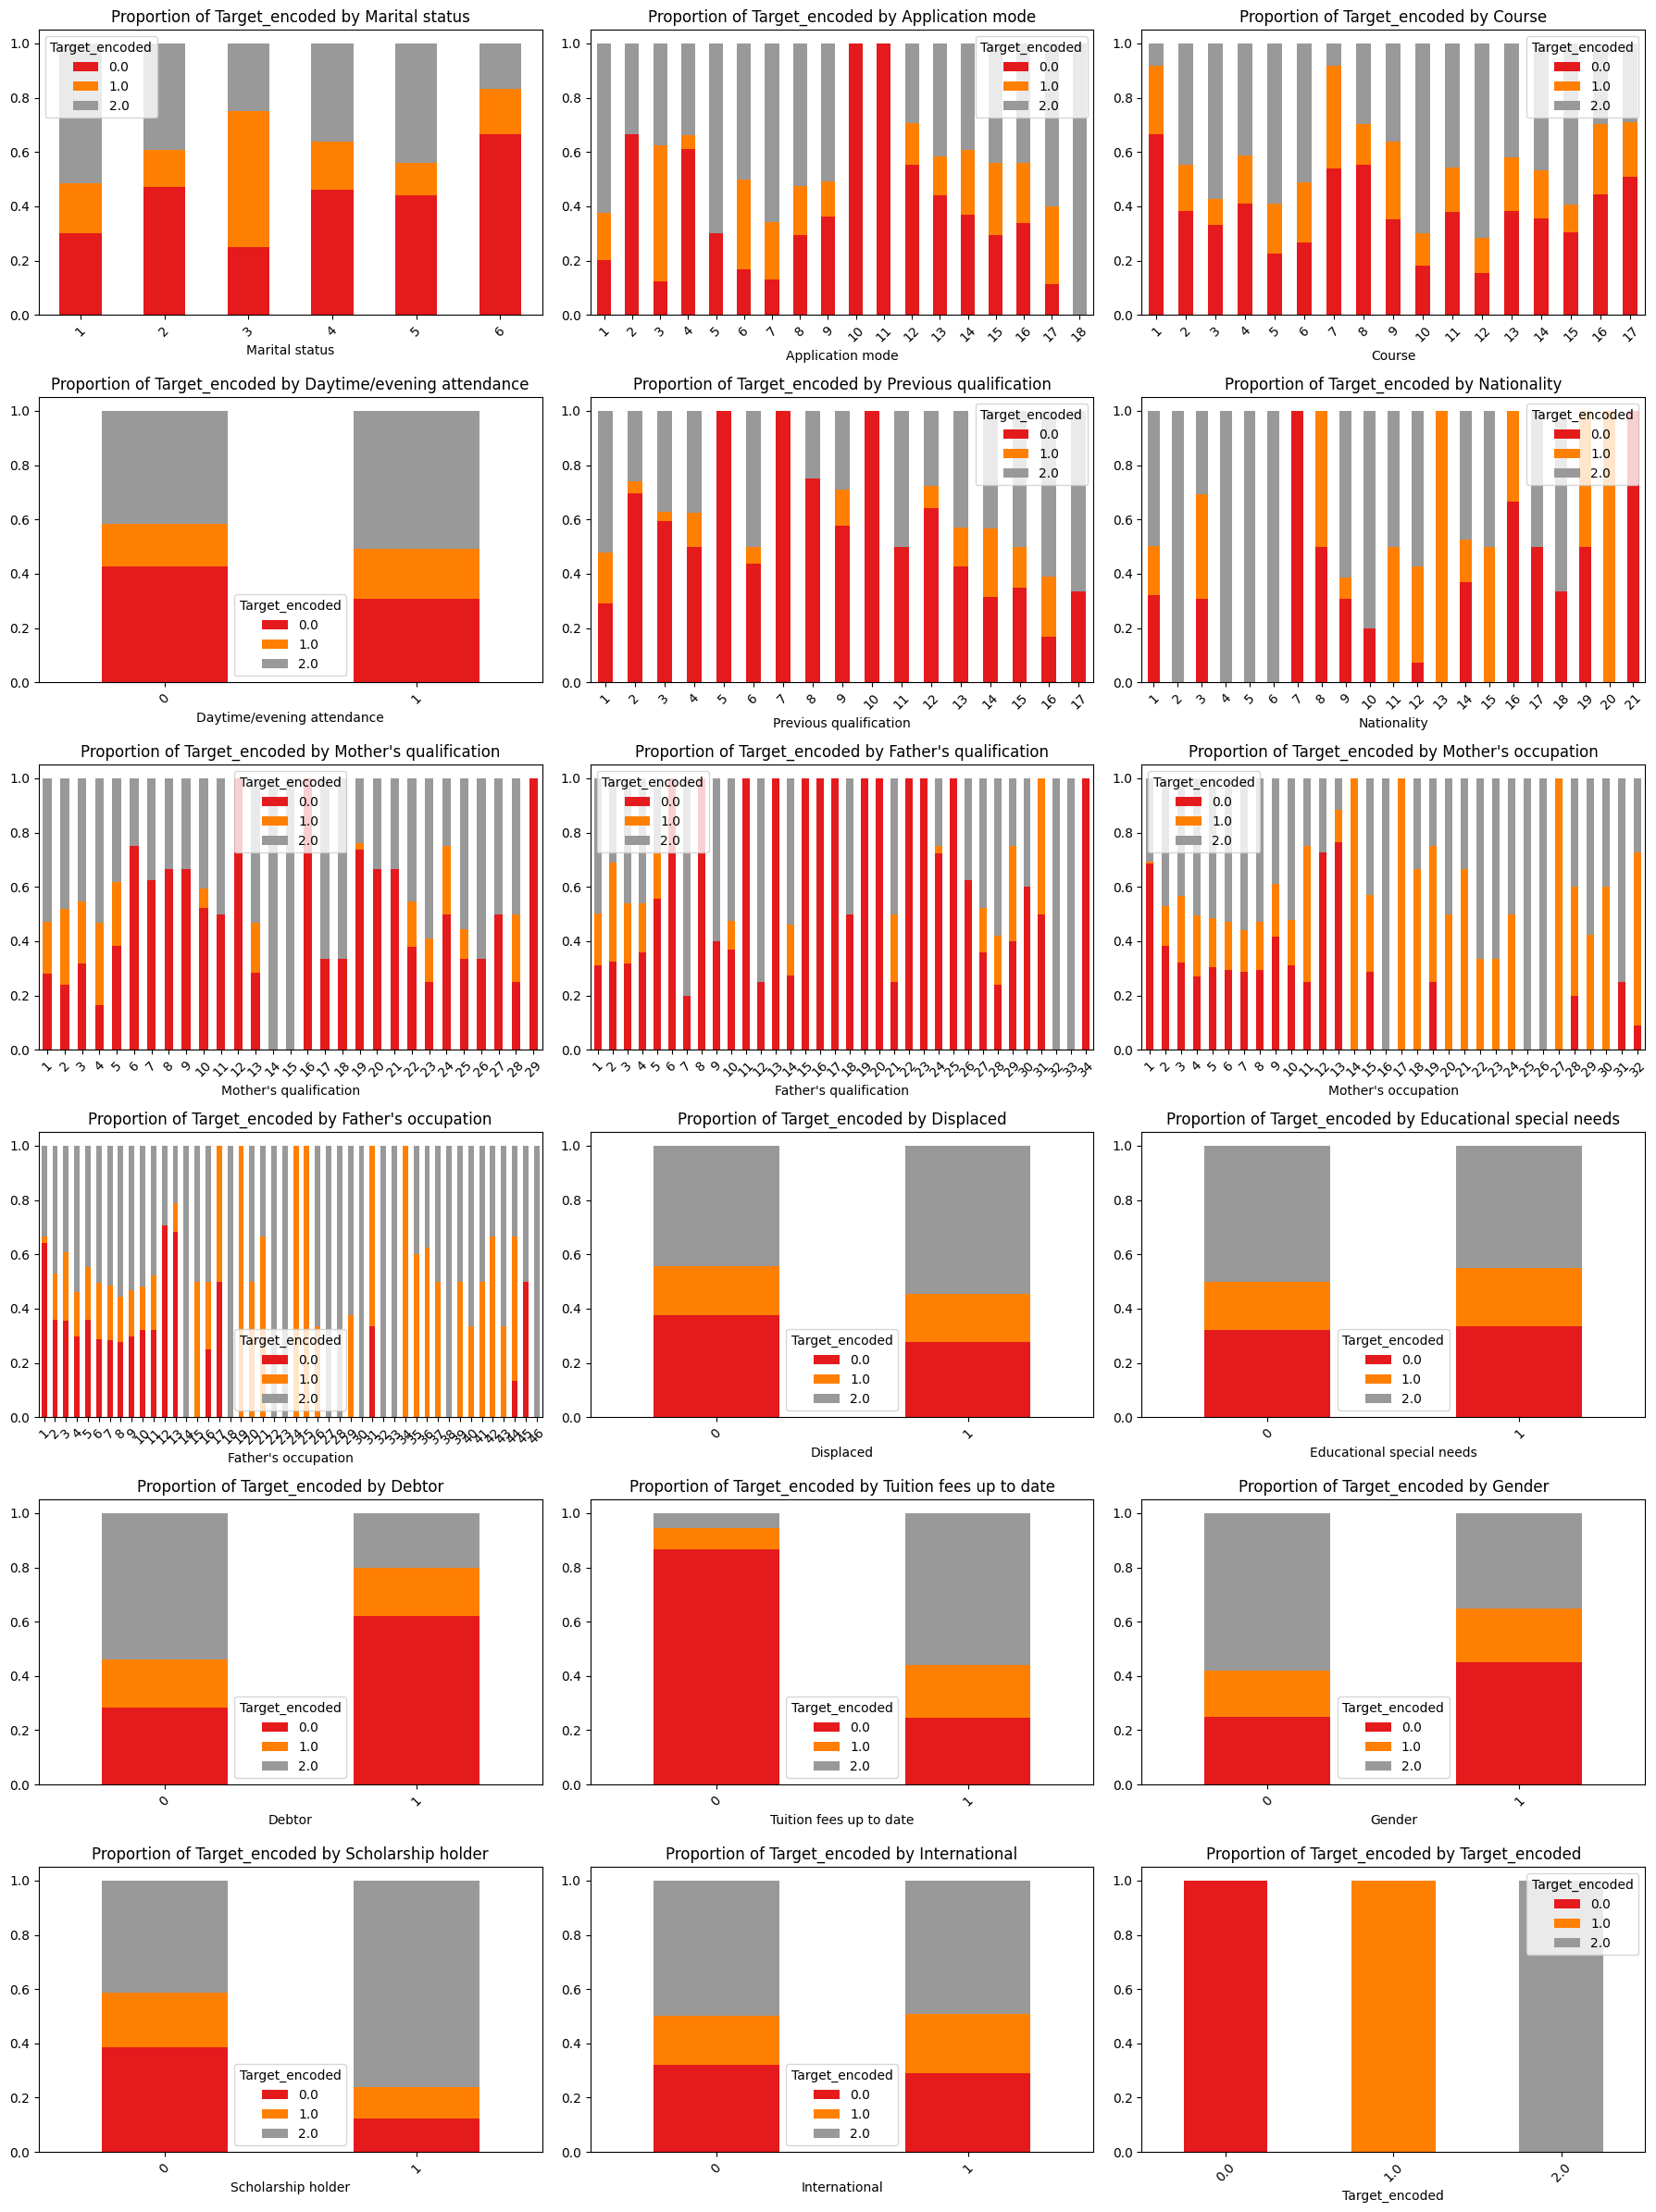

In [89]:
def plot_categorical_target_proportion(df, categorical_cols, target_col):
    import matplotlib.pyplot as plt

    n_cols = 3
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 6, n_rows * 4))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        prop_df = pd.crosstab(df[col], df[target_col], normalize='index')
        prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set1')
        plt.title(f'Proportion of {target_col} by {col}')
        plt.xticks(rotation=45)
        plt.legend(title=target_col)
        plt.tight_layout()

    plt.show()
target_col = 'Target_encoded'
plot_categorical_target_proportion(df, categorical_col, target_col)

# Data Preparation

Data preprocessing involved cleaning the data, handling missing values, encoding categorical variables, and scaling numerical features to prepare the dataset for modeling.

In [90]:
# Drop Unuse Categorical Col
df = df.drop(['Nationality', 'International', 'Educational special needs'], axis = 1)

In [91]:
# Selecting Numeric Feature By Correlation
# Thresholds
high_corr_threshold = 0.8   # for high correlation between features
low_corr_threshold = 0.5    # for low correlation with other features

# Select only numeric columns, excluding the target
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target_encoded' in numeric_cols:
    numeric_cols.remove('Target_encoded')

# Numeric dataframe
numeric_df = df[numeric_cols]

# Correlation matrix for numeric features only
corr_matrix = numeric_df.corr().abs()

# Find pairs with high correlation > threshold (exclude diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > high_corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Columns to drop due to high correlation (drop second item of pair)
cols_to_drop_high_corr = set([pair[1] for pair in high_corr_pairs])

# Find columns with low correlation with *all* other variables (min correlation < threshold)
low_corr_cols = set()
for col in corr_matrix.columns:
    # exclude self-correlation by dropping the diagonal element
    correlations = corr_matrix.loc[col].drop(col)
    if correlations.max() < low_corr_threshold:  # if max correlation with others < threshold
        low_corr_cols.add(col)

# Combine columns to drop
cols_to_drop = cols_to_drop_high_corr.union(low_corr_cols)

# Drop from original df inplace
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped columns due to high correlation: {cols_to_drop_high_corr}")
print(f"Dropped columns due to low max correlation with others: {low_corr_cols}")
print(f"Total dropped columns: {cols_to_drop}")
print(f"Shape of dataframe after dropping: {df.shape}")

Dropped columns due to high correlation: {'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)'}
Dropped columns due to low max correlation with others: {'Unemployment rate', 'Application order', 'GDP', 'Inflation rate', 'Age at enrollment'}
Total dropped columns: {'Curricular units 1st sem (credited)', 'Curricular units 1st sem (approved)', 'Unemployment rate', 'Curricular units 1st sem (enrolled)', 'Application order', 'GDP', 'Inflation rate', 'Age at enrollment', 'Curricular units 1st sem (grade)'}
Shape of dataframe after dropping: (4424, 23)


In [92]:
# Handling Outlier
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for all numerical columns
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

# Check the cleaned DataFrame
print(f"DataFrame after outlier removal:\n{df.describe()}")

DataFrame after outlier removal:
       Curricular units 1st sem (evaluations)  \
count                             2170.000000   
mean                                 8.175576   
std                                  2.329092   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 16.000000   

       Curricular units 1st sem (without evaluations)  \
count                                          2170.0   
mean                                              0.0   
std                                               0.0   
min                                               0.0   
25%                                               0.0   
50%                                               0.0   
75%                                               0.0   
max                                               0.0   

       Curr

In [93]:
# Transformation Numerical Data
# Log Transformation
# Apply log transformation (handling zero or negative values)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    if (df[col] > 0).all():  # Check for positive values
        df[col] = np.log(df[col])
    else:
        # Shift to make all values positive (if necessary)
        min_val = abs(df[col].min()) + 1  # Ensure all values are > 0
        df[col] = np.log(df[col] + min_val)

# Print skewness of transformed columns
print("Skewness after Log Transformation:")
for col in numerical_columns:
    skewness = df[col].skew()
    print(f"{col}: {skewness:.2f}")

Skewness after Log Transformation:
Curricular units 1st sem (evaluations): 0.07
Curricular units 1st sem (without evaluations): 0.00
Curricular units 2nd sem (credited): 0.00
Curricular units 2nd sem (enrolled): -0.33
Curricular units 2nd sem (evaluations): 0.38
Curricular units 2nd sem (approved): -1.98
Curricular units 2nd sem (grade): 0.11
Curricular units 2nd sem (without evaluations): 0.00


In [94]:
# Scale Numerical data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [95]:
# Encoding Categorical feature
categorical_col = df.select_dtypes(include=['category']).columns
encoder = OrdinalEncoder()
df[categorical_col] = encoder.fit_transform(df[categorical_col])

In [96]:
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Scholarship holder,Curricular units 1st sem (evaluations),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_encoded
1,0.0,4.0,9.0,1.0,0.0,0.0,2.0,3.0,3.0,1.0,...,0.0,-0.988214,0.0,0.0,0.331428,-1.011037,0.706717,0.821408,0.0,2.0
3,0.0,6.0,13.0,1.0,0.0,16.0,15.0,5.0,3.0,1.0,...,0.0,0.044098,0.0,0.0,0.331428,0.866202,0.275662,-0.083463,0.0,2.0
4,1.0,8.0,1.0,0.0,0.0,15.0,16.0,9.0,9.0,0.0,...,0.0,0.476882,0.0,0.0,0.331428,-1.011037,0.706717,0.356145,0.0,2.0
8,0.0,0.0,8.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,...,1.0,0.044098,0.0,0.0,0.331428,-0.444547,0.706717,1.140046,0.0,2.0
9,0.0,0.0,8.0,1.0,0.0,0.0,9.0,4.0,7.0,1.0,...,0.0,0.476882,0.0,0.0,0.331428,2.102708,-1.890687,0.707255,0.0,0.0


In [97]:
#Droping target encoded = 1
df = df[df['Target_encoded'] != 1]

In [98]:
df.shape

(1685, 23)

In [99]:
# Identify Feature
X = df.drop('Target_encoded', axis=1)
y = df['Target_encoded']

In [100]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Convert label '2' to '1' in both train and test target sets
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)
# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (1348, 22)
X_test shape: (337, 22)
y_train distribution:
 Target_encoded
1.0    0.746291
0.0    0.253709
Name: proportion, dtype: float64
y_test distribution:
 Target_encoded
1.0    0.747774
0.0    0.252226
Name: proportion, dtype: float64


# Model Development

Modeling involved training classification algorithms, including Random Forest and Logistic Regression, to predict student dropout.

In [101]:
# Random Forest model with balencing
rf_model= RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [104]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# Predict on test data
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # probability for positive class

# Calculate metrics
rf_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
rf_f1 = round(f1_score(y_test, y_pred), 3)  # binary f1 score
rf_auc = round(roc_auc_score(y_test, y_prob), 3)

# Print results
print('Random Forest Performance (Binary Classification):')
print('Balanced Accuracy:', rf_accuracy)
print('F1 Score:', rf_f1)
print('AUC Score:', rf_auc)

Random Forest Performance (Binary Classification):
Balanced Accuracy: 0.831
F1 Score: 0.931
AUC Score: 0.909


In [105]:
# Initialize Logistic Regression with balanced class weights
logreg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]  # Probability for class '1'

# Calculate metrics
logreg_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
logreg_f1 = round(f1_score(y_test, y_pred), 3)
logreg_auc = round(roc_auc_score(y_test, y_prob), 3)

# Print results
print('Logistic Regression Model Performance:')
print('Balanced Accuracy:', logreg_accuracy)
print('F1 Score:', logreg_f1)
print('ROC AUC Score:', logreg_auc)

Logistic Regression Model Performance:
Balanced Accuracy: 0.835
F1 Score: 0.902
ROC AUC Score: 0.894


## Hyper Parameter Tuning

Hyperparameter tuning was performed using grid search to optimize model performance.

In [106]:
# Random Forest Parameter Tuning
# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid search
rf_grid = GridSearchCV(estimator=rf_base, param_grid=rf_param_grid,
                       cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# Best parameters and model
print("Best RF Parameters:", rf_grid.best_params_)
best_rf_model = rf_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [107]:
# Logistic Regression Parameter Tuning
from sklearn.linear_model import LogisticRegression

# Define parameter grid
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Inverse of regularization strength
    'penalty': ['l1', 'l2'],              # Regularization
    'solver': ['liblinear']               # Suitable for small datasets + l1
}

# Initialize model
logreg_base = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Grid search
logreg_grid = GridSearchCV(estimator=logreg_base, param_grid=logreg_param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)

# Best parameters and model
print("Best Logistic Regression Parameters:", logreg_grid.best_params_)
best_logreg_model = logreg_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [108]:
# Report
# Predict and evaluate best RF model
rf_pred = best_rf_model.predict(X_test)
rf_prob = best_rf_model.predict_proba(X_test)[:, 1]
rf_f1 = round(f1_score(y_test, rf_pred), 3)
rf_auc = round(roc_auc_score(y_test, rf_prob), 3)
rf_acc = round(balanced_accuracy_score(y_test, rf_pred), 3)

# Predict and evaluate best Logistic Regression model
logreg_pred = best_logreg_model.predict(X_test)
logreg_prob = best_logreg_model.predict_proba(X_test)[:, 1]
logreg_f1 = round(f1_score(y_test, logreg_pred), 3)
logreg_auc = round(roc_auc_score(y_test, logreg_prob), 3)
logreg_acc = round(balanced_accuracy_score(y_test, logreg_pred), 3)

# Create evaluation table
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression"],
    "F1 Score": [rf_f1, logreg_f1],
    "AUC Score": [rf_auc, logreg_auc],
    "Balanced Accuracy": [rf_acc, logreg_acc]
})

print("Model Evaluation Results (After Hyperparameter Tuning):")
print(results_df)

Model Evaluation Results (After Hyperparameter Tuning):
                 Model  F1 Score  AUC Score  Balanced Accuracy
0        Random Forest     0.928      0.913              0.829
1  Logistic Regression     0.902      0.895              0.835


## Most Importance feature


he most important features were identified from each model to understand key factors influencing dropout and to refine the models by retraining them using only these top features.

In [109]:
# Most Importance feature for Random Forest
# Extract feature importances from the best_rf_model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame and sort by importance
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
top_n = 10
top_features = feat_importances.head(top_n)
print(top_features)

                                   Feature  Importance
19     Curricular units 2nd sem (approved)    0.240282
20        Curricular units 2nd sem (grade)    0.137025
18  Curricular units 2nd sem (evaluations)    0.089054
14  Curricular units 1st sem (evaluations)    0.080795
2                                   Course    0.067452
11                 Tuition fees up to date    0.053354
8                      Father's occupation    0.049474
7                      Mother's occupation    0.043109
1                         Application mode    0.040222
5                   Mother's qualification    0.037606


In [110]:
# Most Importance Feature for Logistic Regression
# Extract coefficients and feature names
coefficients = best_logreg_model.coef_[0]  # for binary classification
feature_names = X_train.columns

# Create a DataFrame and sort by the absolute value of the coefficients
lr_feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Display the top-n features
top_n = 10
lr_top_features = lr_feat_importances.head(top_n)
print(lr_top_features)

                                   Feature  Importance
11                 Tuition fees up to date    2.533112
19     Curricular units 2nd sem (approved)    2.219088
10                                  Debtor    1.376592
12                                  Gender    0.772013
9                                Displaced    0.638837
13                      Scholarship holder    0.591102
14  Curricular units 1st sem (evaluations)    0.375179
20        Curricular units 2nd sem (grade)    0.200681
18  Curricular units 2nd sem (evaluations)    0.169265
17     Curricular units 2nd sem (enrolled)    0.125400


In [111]:
# Creating new Model With Most Importance Parameter
# Get names of top important features from Random Forest
important_feature_names = top_features['Feature'].tolist()

# Subset training and test data with important features
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

# Retrain the best Random Forest model
rf_final = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_final.fit(X_train_important, y_train)

# Predict and evaluate
y_pred_final = rf_final.predict(X_test_important)
y_prob_final = rf_final.predict_proba(X_test_important)[:, 1]

# Compute evaluation metrics
final_f1 = round(f1_score(y_test, y_pred_final), 3)
final_auc = round(roc_auc_score(y_test, y_prob_final), 3)
final_acc = round(balanced_accuracy_score(y_test, y_pred_final), 3)

# Save results in a DataFrame
final_rf_results = pd.DataFrame({
    "Model": ["Random Forest (Top 10 Features)"],
    "F1 Score": [final_f1],
    "AUC Score": [final_auc],
    "Balanced Accuracy": [final_acc]
})

# Get top important features from Logistic Regression
important_lr_features = lr_top_features['Feature'].tolist()

# Subset data
X_train_lr_important = X_train[important_lr_features]
X_test_lr_important = X_test[important_lr_features]

# Retrain Logistic Regression model
lr_final = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_final.fit(X_train_lr_important, y_train)

# Predict
y_pred_lr_final = lr_final.predict(X_test_lr_important)
y_prob_lr_final = lr_final.predict_proba(X_test_lr_important)[:, 1]

# Evaluate
lr_final_f1 = round(f1_score(y_test, y_pred_lr_final), 3)
lr_final_auc = round(roc_auc_score(y_test, y_prob_lr_final), 3)
lr_final_acc = round(balanced_accuracy_score(y_test, y_pred_lr_final), 3)

# Save results in a DataFrame
final_lr_results = pd.DataFrame({
    "Model": ["Logistic Regression (Top 10 Features)"],
    "F1 Score": [lr_final_f1],
    "AUC Score": [lr_final_auc],
    "Balanced Accuracy": [lr_final_acc]
})

# Combine both results into a single table
final_comparison = pd.concat([final_rf_results, final_lr_results], ignore_index=True)

print("\n📈 Final Model Comparison (Top 10 Features Only):")
print(final_comparison)


📈 Final Model Comparison (Top 10 Features Only):
                                   Model  F1 Score  AUC Score  \
0        Random Forest (Top 10 Features)     0.932      0.893   
1  Logistic Regression (Top 10 Features)     0.895      0.875   

   Balanced Accuracy  
0              0.841  
1              0.833  


# Simulation

In [112]:
# ==== 1. Top 10 Important Features ====
top_features = [
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 1st sem (evaluations)',
    'Course',
    'Tuition fees up to date',
    "Father's occupation",
    "Mother's occupation",
    'Application mode',
    "Mother's qualification"
]

# ==== 2. Copy relevant data ====
df_top = df[top_features].copy()

# ==== 3. Reverse log and standard scaling for numeric features ====
# Use original mean and std from the raw (log-transformed) data
original_stats = {
    'Curricular units 2nd sem (approved)': {'mean': 1.44, 'std': 1.44},
    'Curricular units 2nd sem (grade)': {'mean': 2.56, 'std': 0.64},
    'Curricular units 2nd sem (evaluations)': {'mean': 1.63, 'std': 0.69},
    'Curricular units 1st sem (evaluations)': {'mean': 1.70, 'std': 0.67}
}

def inverse_transform(value, mean, std):
    return np.expm1((value * std) + mean)

for feature in original_stats:
    mean = original_stats[feature]['mean']
    std = original_stats[feature]['std']
    df_top[feature] = df_top[feature].apply(lambda x: inverse_transform(x, mean, std))

# ==== 4. Define Risk Thresholds ====
thresholds = {
    'Curricular units 2nd sem (approved)': [4, 2],  # ≥4 = Safe, ≥2 = Moderate, <2 = At Risk
    'Curricular units 2nd sem (grade)': [14.0, 10.0],
    'Curricular units 2nd sem (evaluations)': [6, 3],
    'Curricular units 1st sem (evaluations)': [6, 3],
    'Course': [[33, 171, 999], [8012, 9999]],  # Safe and Moderate course IDs
    'Tuition fees up to date': [[1], [0]],  # 1 = Up-to-date (Safe), 0 = Not (Moderate)
    "Father's occupation": [[3, 4, 5], [1, 2]],
    "Mother's occupation": [[3, 4, 5], [1, 2]],
    'Application mode': [[1, 2], [5, 6]],
    "Mother's qualification": [[4, 5], [2, 3]]  # 4 = Bachelor's, 5 = Master's
}

# ==== 5. Function to classify individual feature ====
def classify_feature(feature, value):
    th = thresholds[feature]
    if all(isinstance(x, (int, float)) for x in th):  # Numeric feature
        safe_th, moderate_th = th
        if value >= safe_th:
            return "Safe"
        elif value >= moderate_th:
            return "Moderate"
        else:
            return "At Risk"
    else:  # Categorical feature
        safe_vals = th[0]
        moderate_vals = th[1]
        if value in safe_vals:
            return "Safe"
        elif value in moderate_vals:
            return "Moderate"
        else:
            return "At Risk"

# ==== 6. Function to classify overall student risk ====
def classify_student_risk(row):
    risk_counts = {'Safe': 0, 'Moderate': 0, 'At Risk': 0}
    for feature in top_features:
        level = classify_feature(feature, row[feature])
        risk_counts[level] += 1

    if risk_counts['At Risk'] >= 4:
        return 'High Risk'
    elif risk_counts['Moderate'] >= 4 or risk_counts['At Risk'] >= 2:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# ==== 7. Apply Risk Classification ====
df_top['Overall_Risk'] = df_top.apply(classify_student_risk, axis=1)

# ==== 8. Split Students by Risk Category ====
high_risk = df_top[df_top['Overall_Risk'] == 'High Risk']
moderate_risk = df_top[df_top['Overall_Risk'] == 'Moderate Risk']
low_risk = df_top[df_top['Overall_Risk'] == 'Low Risk']

# ==== 9. Summary Output ====
print("📊 Risk Classification Summary:")
print(df_top['Overall_Risk'].value_counts())

# ==== 10. View Example Rows ====
df_top.head(4)

📊 Risk Classification Summary:
Overall_Risk
High Risk        1493
Moderate Risk     192
Name: count, dtype: int64


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (evaluations),Curricular units 1st sem (evaluations),Course,Tuition fees up to date,Father's occupation,Mother's occupation,Application mode,Mother's qualification,Overall_Risk
1,10.677607,20.882801,1.540560,1.823272,9.0,0.0,3.0,3.0,4.0,0.0,High Risk
3,5.277383,11.262961,8.278312,4.638091,13.0,1.0,3.0,5.0,6.0,16.0,Moderate Risk
4,10.677607,15.247399,1.540560,6.534639,1.0,1.0,9.0,9.0,8.0,15.0,High Risk
8,10.677607,25.832912,2.755655,4.638091,8.0,1.0,9.0,9.0,0.0,0.0,High Risk


# Conclussion

✅ Conclusion
- Random Forest consistently yields higher F1 Score and AUC Score, indicating better performance in terms of precision-recall trade-off and ranking ability.

- Balanced Accuracy is slightly better in Logistic Regression on the full feature set, but Random Forest takes the lead when using top 10 features.

- After feature selection, Random Forest improves further, outperforming Logistic Regression in all metrics.

- Academic performance, especially during the second semester, combined with financial status and family background, are key factors in predicting whether a student will drop out. This information can help focus interventions on students struggling academically and those facing financial or social challenges.

- Students with low or inconsistent evaluation counts and low pass rates tend to be classified as High Risk.

- Even students with relatively high grades (e.g., student 8 with a 25.83 average) may be marked at high risk if other factors (like evaluations, course, or parental background) trigger concern.

- Students with more balanced academic records and paid tuition (e.g., student 3) are classified as Moderate Risk, suggesting that payment status and academic participation (evaluations) play a key role in lowering risk levels.